In [2]:
%reload_ext autoreload
%autoreload 2


import numpy as np
from scipy.sparse import csr_matrix
from scipy.linalg import eig
from scipy.sparse.linalg import eigs, eigsh
from cuml.manifold.lanczos import eig_lanczos
from sklearn.utils.validation import check_symmetric
from scipy.sparse import random
from scipy.sparse.linalg import lobpcg
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import time

np.set_printoptions(precision=4, suppress=True, threshold=50)


# A = np.array([[-6.0, 3.0],
#               [4.0, 5.0]])

# A = np.array([[2.0, 0.0, 0.0],
#               [0.0, 4.0, 4.0],
#               [0.0, 4.0, 3.0]])

# B = np.zeros((4, 4))

# B[:3, :3] = A

# A = B
# A[3, 3] = 3


# rows = 20
# cols = 20
# sparse_matrix = random(rows, cols, density=0.02, random_state=42)
# sparse_matrix = sparse_matrix.astype(np.float32)
# print(sparse_matrix.dtype)
# A = sparse_matrix + sparse_matrix.T
# print(f"Sparsity: {(np.count_nonzero(A.toarray())) / (rows*cols):.0%}")
# print(A.dtype)

# eigenvalues, eigenvectors = eigsh(csr_matrix(A), k=3, which="SA", maxiter=10000, tol=0.01)
# dot = np.dot(eigenvectors[:, 0], eigenvectors[:, 1])
# print(f"\033[4meigsh()\033[0m\n")
# print("Eigenvalues:")
# print(eigenvalues)

# print("\nEigenvectors:")
# print(eigenvectors)
# print("dot", dot)

# r = np.random.RandomState(42)
# X0 = r.standard_normal(size=(rows, 3))
# eigenvalues, eigenvectors = lobpcg(csr_matrix(A), X=X0, largest=False, maxiter=10000, tol=0.01)
# dot = np.dot(eigenvectors[:, 0], eigenvectors[:, 1])
# print(f"\n\033[4mlobpcg()\033[0m\n")
# print("Eigenvalues:")
# print(eigenvalues)

# print("\nEigenvectors:")
# print(eigenvectors)
# print("dot", dot)
dists_double = {}
dists_float = {}

def solve(size, sparsity, maxiter, tol):
    dists_double_list = []
    dists_float_list = []
    rows = size
    cols = size
    sparse_matrix = random(rows, cols, density=sparsity, random_state=42)
    sparse_matrix = sparse_matrix.astype(np.float32)
    X = sparse_matrix + sparse_matrix.T
    eigenvalues, eigenvectors = eigsh(csr_matrix(X), k=6, which="SA", maxiter=1000, tol=tol)
    print(eigenvalues)
    print(eigenvectors)
    dot1, dot2, dot3 = np.dot(eigenvectors[:, 0], eigenvectors[:, 1]), np.dot(eigenvectors[:, 0], eigenvectors[:, 2]), np.dot(eigenvectors[:, 1], eigenvectors[:, 2])
    print(dot1, dot2, dot3)
    r = np.random.RandomState(42)
    X0 = r.standard_normal(size=(rows, 6))
    eigenvalues, eigenvectors = lobpcg(csr_matrix(X), X=X0, largest=False, maxiter=1000, tol=tol)
    print(eigenvalues)
    print(eigenvectors)
    dot1, dot2, dot3 = np.dot(eigenvectors[:, 0], eigenvectors[:, 1]), np.dot(eigenvectors[:, 0], eigenvectors[:, 2]), np.dot(eigenvectors[:, 1], eigenvectors[:, 2])
    print(dot1, dot2, dot3)
    print("maxiter", "eigenvalues_float - eigenvalues_double", "eigenvalues_float", "eigenvalues_double")
    for i in range(maxiter, maxiter+1):
        eigenvalues_double, eigenvectors_double, eig_iters_double = eig_lanczos(csr_matrix(X), 6, 42, dtype=np.float64, maxiter=i, tol=tol, conv_n_iters=5, conv_eps=0.001, handle=None)
        dot1_double, dot2_double, dot3_double = np.dot(eigenvectors_double[:, 0], eigenvectors_double[:, 1]), np.dot(eigenvectors_double[:, 0], eigenvectors_double[:, 2]), np.dot(eigenvectors_double[:, 1], eigenvectors_double[:, 2])
        
        eigenvalues_float, eigenvectors_float, eig_iters_float = eig_lanczos(csr_matrix(X), 6, 42, dtype=np.float32, maxiter=i, tol=tol, conv_n_iters=5, conv_eps=0.001, handle=None)
        dot1_float, dot2_float, dot3_float = np.dot(eigenvectors_float[:, 0], eigenvectors_float[:, 1]), np.dot(eigenvectors_float[:, 0], eigenvectors_float[:, 2]), np.dot(eigenvectors_float[:, 1], eigenvectors_float[:, 2])

        
        # dists_double_list.append(euclidean(eigenvalues, eigenvalues_double))
        # dists_float_list.append(euclidean(eigenvalues, eigenvalues_float))
        # print(i, eig_iters_float, eig_iters_double, eigenvalues_float, eigenvalues_double, np.array([dot1_float, dot2_float, dot3_float]), np.array([dot1_double, dot2_double, dot3_double]))
        time.sleep(1)
        print(i, eig_iters_double, eigenvalues_double, np.array([dot1_double, dot2_double, dot3_double]))
        print(i, eig_iters_float, eigenvalues_float, np.array([dot1_float, dot2_float, dot3_float]))

    dists_double[f"size={X.shape[0]}x{X.shape[1]}, sparsity={(np.count_nonzero(X.toarray())) / (rows*cols):.0%}, maxiter={maxiter}, tol={tol}"] = dists_double_list
    dists_float[f"size={X.shape[0]}x{X.shape[1]}, sparsity={(np.count_nonzero(X.toarray())) / (rows*cols):.0%}, maxiter={maxiter}, tol={tol}"] = dists_float_list
# solve(4, 0.1, 50, 0.01)
# solve(4, 0.1, 50, 1e-6)
# solve(4, 0.1, 50, 1e-9)
# solve(10, 0.1, 50, 0.01)
# solve(10, 0.1, 50, 1e-6)
# solve(10, 0.1, 50, 1e-9)
# solve(20, 0.02, 50, 0.01)
# solve(20, 0.02, 50, 1e-6)
# solve(20, 0.02, 50, 1e-9)
# solve(50, 0.02, 50, 0.01)
# solve(50, 0.02, 50, 1e-6)
# solve(50, 0.02, 50, 1e-9)
solve(100, 0.02, 100, 1e-9)
# solve(100, 0.02, 50, 1e-6)
# solve(100, 0.02, 50, 1e-9)
# solve(1000, 0.02, 1000, 0.01)
# solve(1000, 0.02, 100, 1e-6)
# solve(1000, 0.02, 400, 1e-9)
# solve(10000, 0.02, 100, 0.01)
# solve(10000, 0.02, 100, 1e-6)
# solve(10000, 0.04, 2000, 1e-9)
# solve(100000, 0.02, 1000, 1e-9)

YO [ 1  0  6  1  6  0  1  0 80  0 63]
[-2.4088 -2.2608 -2.1742 -2.0511 -1.9119 -1.8636]
[[-0.2073  0.196   0.0887 -0.0555  0.0027  0.0549]
 [-0.0761  0.0551 -0.0562  0.143   0.0234 -0.0321]
 [-0.0023 -0.0138  0.062   0.0268  0.1766 -0.0012]
 ...
 [ 0.022   0.037  -0.0073 -0.0304  0.0111 -0.0421]
 [-0.036   0.0388  0.0223 -0.0431  0.0206  0.0245]
 [-0.2176  0.0881  0.0215  0.3264  0.0303 -0.1342]]
-1.2121745e-07 6.664777e-09 -6.3009793e-09
[-2.4088 -2.2608 -2.1742 -2.0511 -1.9119 -1.8636]
[[-0.2073  0.196  -0.0887 -0.0555 -0.0027  0.0549]
 [-0.0761  0.0551  0.0562  0.143  -0.0234 -0.0321]
 [-0.0023 -0.0138 -0.062   0.0268 -0.1766 -0.0012]
 ...
 [ 0.022   0.037   0.0073 -0.0304 -0.0111 -0.0421]
 [-0.036   0.0388 -0.0223 -0.0431 -0.0206  0.0245]
 [-0.2176  0.0881 -0.0215  0.3264 -0.0303 -0.1342]]
-1.1102230246251565e-16 6.938893903907228e-18 -3.2612801348363973e-16
maxiter eigenvalues_float - eigenvalues_double eigenvalues_float eigenvalues_double


CUDARuntimeError: cudaErrorNoDevice: no CUDA-capable device is detected

dict_values([[85.06113394331045]])


/tmp/ipykernel_3472044/2048216439.py:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim(0, x_limit)


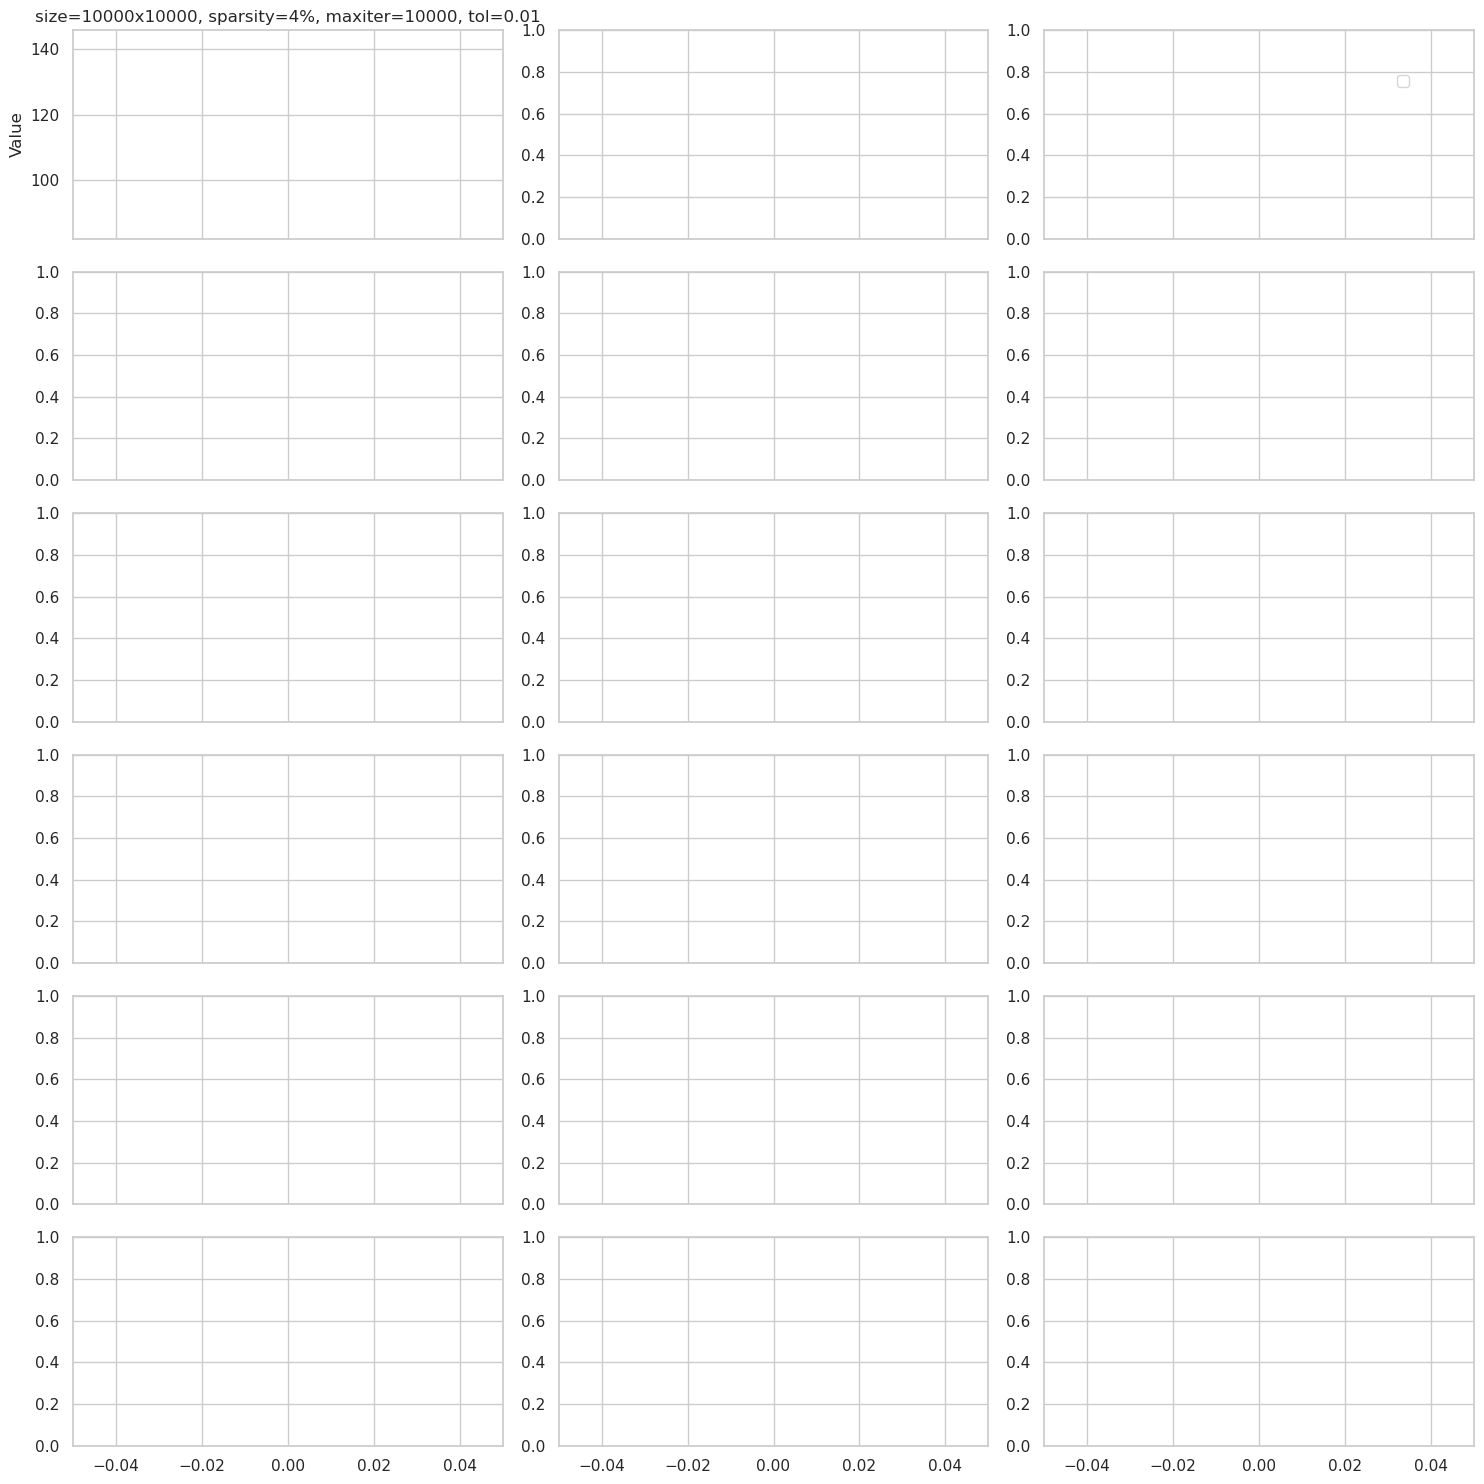

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap

# Check if both dicts have the same keys
assert set(dists_double.keys()) == set(dists_float.keys()), "Keys in dists_double and dists_float must match"
print(dists_float.values())
# Use Seaborn style
sns.set(style='whitegrid')

# Create subplots
fig, axs = plt.subplots(6, 3, figsize=(15, 15), sharex=True)

# Flatten the axs array since we're iterating over a 2D grid
axs = axs.flatten()

# Plot each pair
for i, key in enumerate(dists_double.keys()):
    # Plot dists_double[key] and dists_float[key] on the i-th subplot
    sns.lineplot(x=np.arange(len(dists_double[key])), y=dists_double[key], ax=axs[i], label='Double')
    sns.lineplot(x=np.arange(len(dists_float[key])), y=dists_float[key], ax=axs[i], label='Float')

    # Set y-axis limits
    # axs[i].set_ylim(0, 1)

    # Set title and labels (wrap the title if needed)
    axs[i].set_title("\n".join(wrap(f"{key}", 60)))
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Value')

    # Calculate x-axis limits based on the length of data
    x_limit_double = len(dists_double[key]) - 1  # Adjust for zero-based indexing
    x_limit_float = len(dists_float[key]) - 1
    x_limit = max(x_limit_double, x_limit_float)
    axs[i].set_xlim(0, x_limit)

    # Remove legend from individual subplots as we'll create a single legend
    axs[i].legend().remove()

# Get handles and labels for the last subplot (assuming they are the same for all subplots)
handles, labels = axs[-1].get_legend_handles_labels()

# Create a single legend for the entire figure
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95))

plt.tight_layout()
plt.show()
